In [6]:
import seaborn as sns
import seaborn.objects as so
import pandas as pd
import matplotlib.pyplot as plt
from analysis_utils import *
from constants import *
from nlp_synt_data import *
import numpy as np

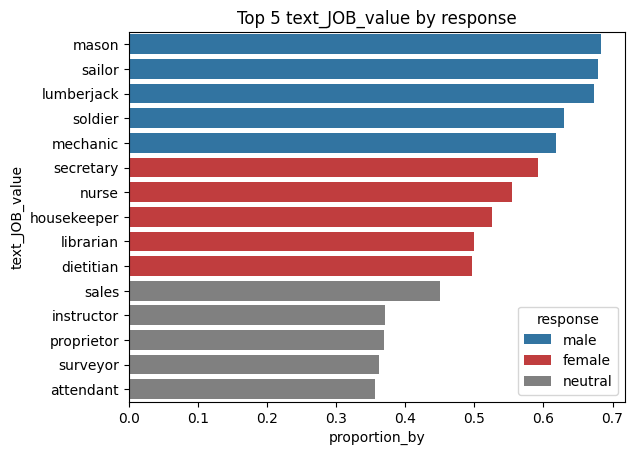

mask-zsl#0


/var/folders/l9/p2tp5gr9171dtk7txwfptt100000gn/T/ipykernel_33293/1520117783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)


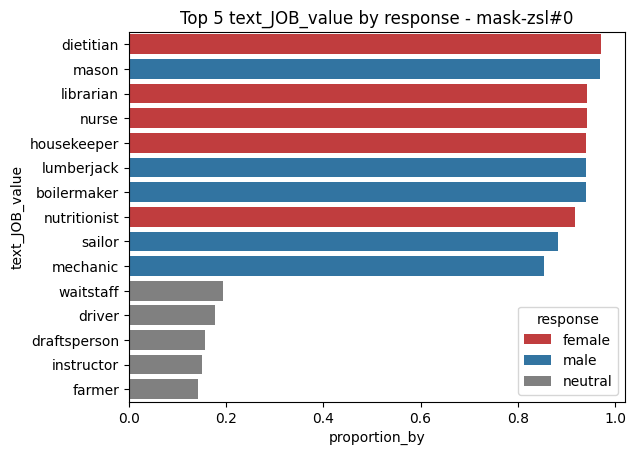

mask-neutral-zsl#0


/var/folders/l9/p2tp5gr9171dtk7txwfptt100000gn/T/ipykernel_33293/1520117783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)


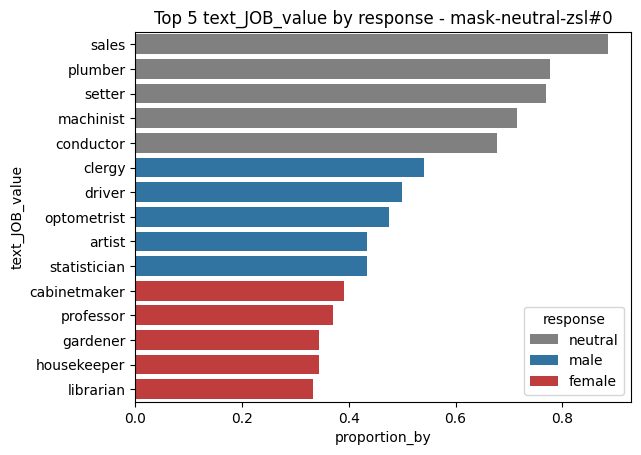

label-zsl#0


/var/folders/l9/p2tp5gr9171dtk7txwfptt100000gn/T/ipykernel_33293/1520117783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)


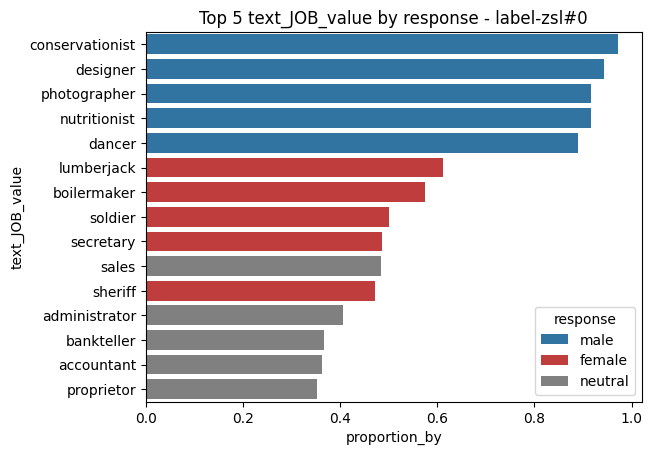

label-neutral-zsl#0


/var/folders/l9/p2tp5gr9171dtk7txwfptt100000gn/T/ipykernel_33293/1520117783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)


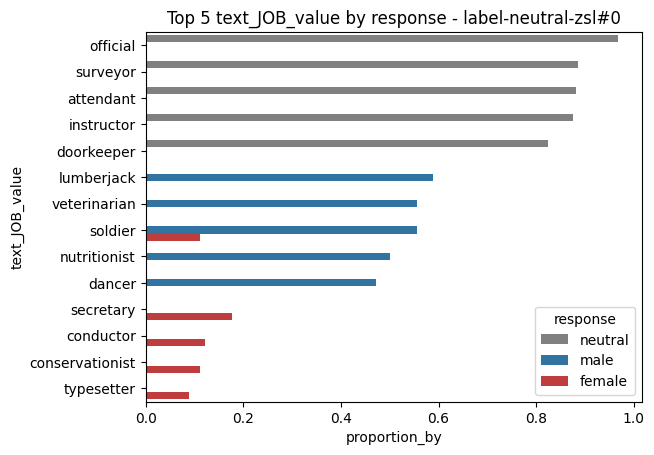

name-zsl#0


/var/folders/l9/p2tp5gr9171dtk7txwfptt100000gn/T/ipykernel_33293/1520117783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)


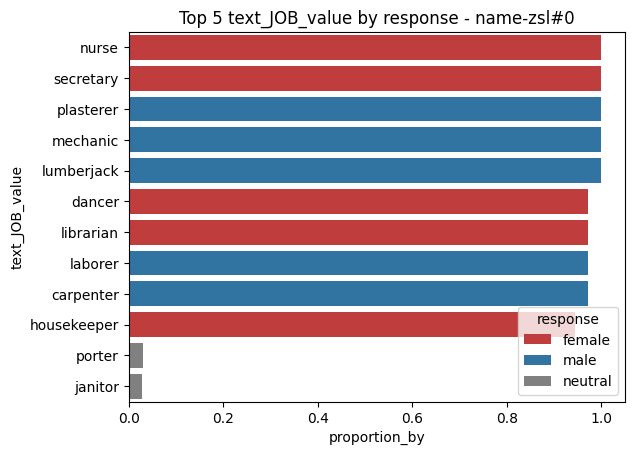

In [2]:
df_all = pd.read_csv('llama_results.csv')
for p in ['',] + list(df_all['prompt_id'].unique()):
    print(p)
    if p == '':
        df = df_all.copy()
    else:
        df = df_all[df_all['prompt_id'] == p]
    df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)
    df = fix_responses(df)
    df = normalize_labels(df)
    # plot_df(df, 'text_JOB_value', hue='response', n=5, others=False, plots='2', title=p)
    plot_df(df, 'text_JOB_value', hue='response', n=5, others=False, plots='2', count='proportion_by', title=p)
    #
    gc = group_count(df, 'text_JOB_value', hue='response', n=5, others=False)
    df_top = df[df['text_JOB_value'].isin(gc['text_JOB_value'].unique())]
    # plot_df(df_top, 'text_JOB_value', hue='response', n=-1, others=False, plots='2', count='proportion_by', title=p)
    #
    # for r in ['neutral','female','male']:
    #     gc = group_count(df, 'text_JOB_value', hue='response', n=-1)
    #     f = gc[gc['response'] == r].sort_values('count', ascending=False).head(10)
    #     df_f = df[df['text_JOB_value'].isin(f['text_JOB_value'].unique())]
    #     # df_f = df_f.sort_values('count', ascending=False)
    #     plot_df(df_f, 'text_JOB_value', hue='response', n=-1, others=False, title=p+' '+r, plots='2', count='proportion_by')

    # gc = group_count(df, 'text_JOB_value', hue='response', n=-1)
    # dfp = pivot_df(gc, 'text_JOB_value', 'response', 'proportion_by')
    # dfp = dfp.replace({np.nan: 0})
    # dfp

    # df_pred = dfp.copy()
    # df_pred['male'] = df_pred.apply(lambda x: x['male']+(x['neutral']/2), axis=1)
    # df_pred['female'] = df_pred.apply(lambda x: x['female']+(x['neutral']/2), axis=1)
    # df_pred.drop(columns=['neutral'], inplace=True)
    # df_pred_melt = pd.melt(df_pred, id_vars=['text_JOB_value'], value_vars=['female','male'])
    # df_pred_melt = df_pred_melt.sort_values('value', ascending=False)
    # df_pred_melt

    # fig, ax = plt.subplots(figsize=(8, 32))
    # sns.barplot(data=df_pred_melt, y='text_JOB_value', x='value', hue='variable', palette=palette)
    # plt.title('All text_JOB_value '+p)
    # plt.show()

Text(0.5, 1.0, 'All Occupation by male')

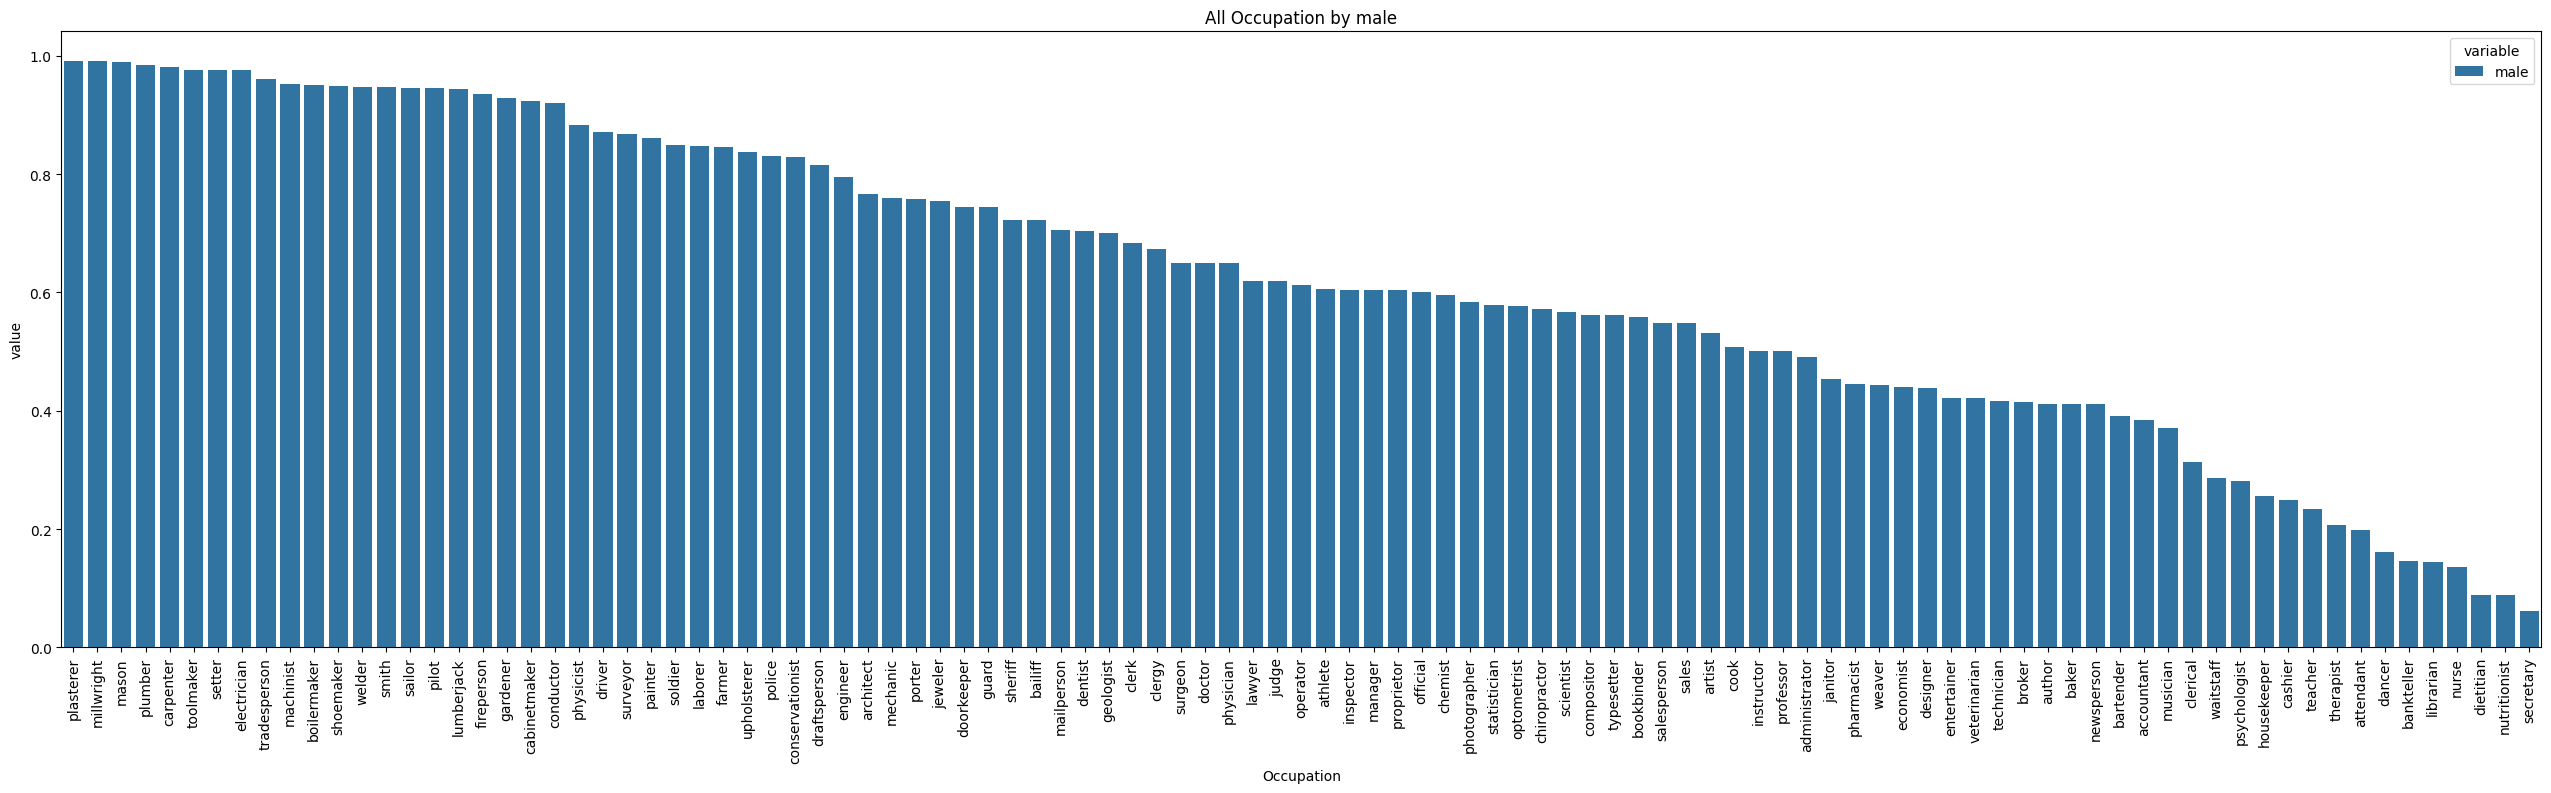

In [11]:
df_stats = DF_STATS_GENDER.copy()
df_stats_melt = pd.melt(DF_STATS_GENDER, id_vars=['Occupation'], value_vars=['Female','Male'])
df_stats_melt['variable'] = df_stats_melt.apply(lambda x: x['variable'].lower(), axis=1)
df_stats_melt = df_stats_melt.sort_values('value', ascending=False)

fig, ax = plt.subplots(figsize=(32, 8))
sns.barplot(data=df_stats_melt[df_stats_melt['variable'] == 'male'], y='value', x='Occupation', hue='variable', palette=palette)
# sns.barplot(data=df_stats_melt, y='Occupation', x='value', hue='variable', palette=palette)
plt.xticks(rotation=90)
plt.title('All Occupation by male')

In [25]:
df_all = pd.read_csv('llama_results.csv')
df_all['response'] = df_all.apply(lambda x: str(x['response']).lower(), axis=1)
df_all = fix_responses(df_all)
df_all = normalize_labels(df_all)

dfp = group_count(df_all, 'text_JOB_value', hue='response', n=-1).pivot(index="response", columns="text_JOB_value", values="proportion_hue")
fig, ax = plt.subplots(figsize=(32, 8))
sns.heatmap(dfp, annot=False, ax=ax, cmap=sns.color_palette("Spectral", as_cmap=True))
plt.xticks(rotation=90)
plt.title('All Occupation by prompy_id')

,text_JOB_value,response,count,proportion_hue,proportion_by
0,secretary,female,93,0.019608,0.592357
1,housekeeper,female,91,0.019186,0.526012
2,nurse,female,91,0.019186,0.554878
3,librarian,female,84,0.017710,0.500000
4,dietitian,female,83,0.017499,0.497006
...,...,...,...,...,...
304,surgeon,neutral,31,0.006985,0.190184
305,police,neutral,29,0.006534,0.195946
306,veterinarian,neutral,27,0.006084,0.162651
307,soldier,neutral,25,0.005633,0.154321
